In [1]:
import pandas as pd
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [2]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data = data.dropna(how='any',axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns=['labels','body_text']

In [7]:
data.head()

,labels,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import nltk

In [11]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
import re
import string
def clean_text(text):
  text =''.join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.findall('\S+',text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
  return text


In [17]:
data['cleaned_text']=data['body_text'].apply(lambda x:clean_text(x))
data.head()

,labels,body_text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


In [18]:
spam_words = list(data.loc[data.labels=='spam','cleaned_text'])

In [19]:
spam_words

[['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'å£150',
  'rcv'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
  'å£900',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hour'],
 ['mobile',
  '11',
  'month',
  'u',
  'r',
  'entitled',
  'update',
  'latest',
  'colour',
  'mobile',
  'camera',
  'free',
  'call',
  'mobile',
  'update',
  'co',
  'free',
  '08002986030'],
 ['six',
  'chance',
  'win',
  'cash',
  '100',
  '20000',
  'pound',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6days',
  '16

In [21]:
import numpy as np
spam_words = list(np.concatenate(spam_words).flat)

In [22]:
spam_words

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'å£150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'mem

In [23]:
from collections import Counter

In [25]:
spam_words = Counter(spam_words)
spam_words = pd.DataFrame(spam_words.most_common(30),columns=['words', 'frequency'])

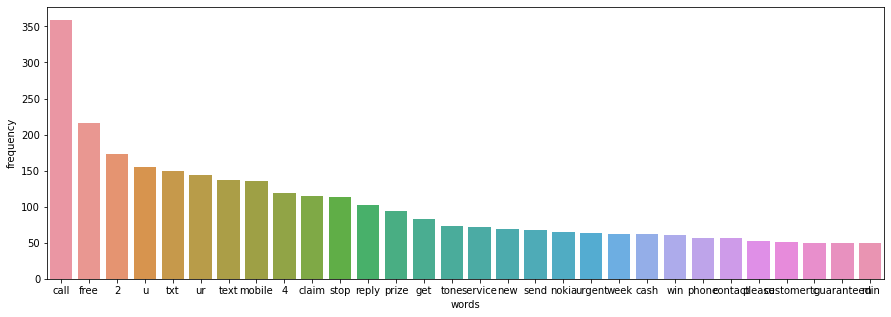

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize = (15,5))
sns.barplot(x='words', y = 'frequency', data=spam_words , ax=ax)

In [32]:
data['body_len']= data.body_text.apply(lambda x:len(x)- x.count(' '))

In [33]:
data.head()

,labels,body_text,cleaned_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",92
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",128
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",39
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",49


In [34]:
def punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return (round(count/(len(text) -text.count(' ')),3))*100

In [36]:
data['punct%']= data.body_text.apply(lambda x: punct(x))

In [37]:
data.head()

,labels,body_text,cleaned_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",92,9.8
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",49,4.1


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(data[['body_text','body_len','punct%']],data.labels,random_state=42, test_size=0.2)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfvector= TfidfVectorizer(analyzer=clean_text)

In [57]:
tfvector.fit(X_train['body_text'])

TfidfVectorizer(analyzer=<function clean_text at 0x7f9f17c57b90>)

In [58]:
tf_train = tfvector.transform(X_train['body_text'])

In [59]:
tf_test = tfvector.transform(X_test['body_text'])


In [60]:
X_train = pd.concat([X_train[['body_len','punct%']].reset_index(drop= True),pd.DataFrame(tf_train.toarray())],axis = 1)

In [61]:
X_test = pd.concat([X_test[['body_len','punct%']].reset_index(drop= True),pd.DataFrame(tf_test.toarray())],axis = 1)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None, random_state=42, n_jobs=-1)

In [64]:
rf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(n_jobs=-1, random_state=42)

In [65]:
Y_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [71]:
from sklearn.metrics import precision_recall_fscore_support as score

In [72]:
precision , recall , fscore, support = score(Y_test,Y_pred,pos_label='spam', average='binary')

In [75]:
print(precision)
print(recall)

1.0
0.8333333333333334
